# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-09-25 01:00:11--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-09-25 01:00:12--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip.2’

customer

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [ ]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)


,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


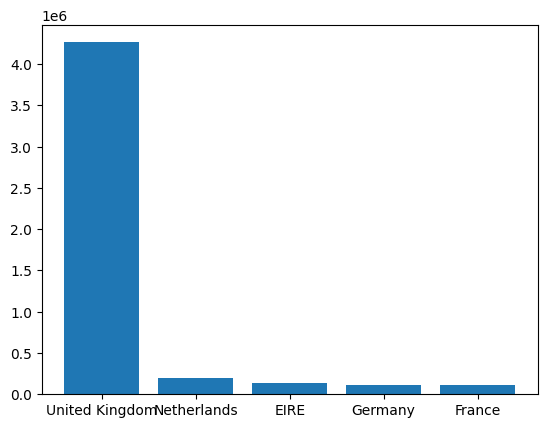

In [ ]:
totales = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure()
plt.bar(totales.index, totales.values)
plt.show()

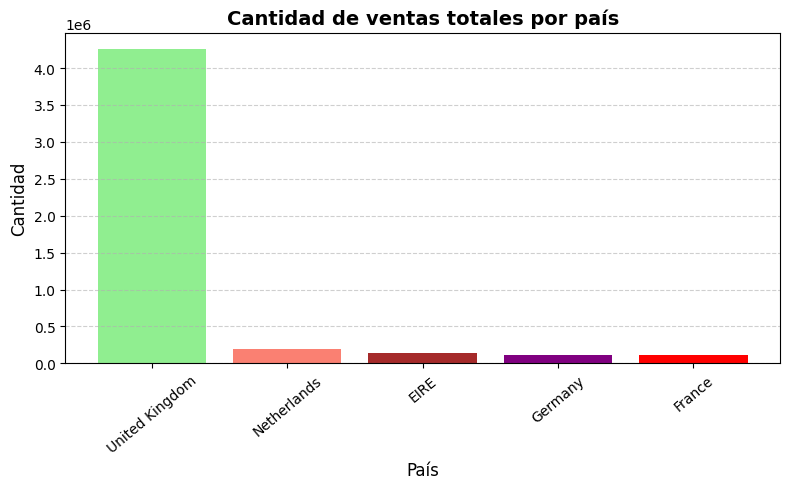

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(totales.index, totales.values, color=['lightgreen', 'salmon', 'brown','purple', 'red'])
plt.title('Cantidad de ventas totales por país', fontsize=14, fontweight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=40)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [ ]:
Stock_Count=data['StockCode'].value_counts().head(10)
Stock_Count


,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
84879,1502
22720,1477
22197,1476
21212,1385


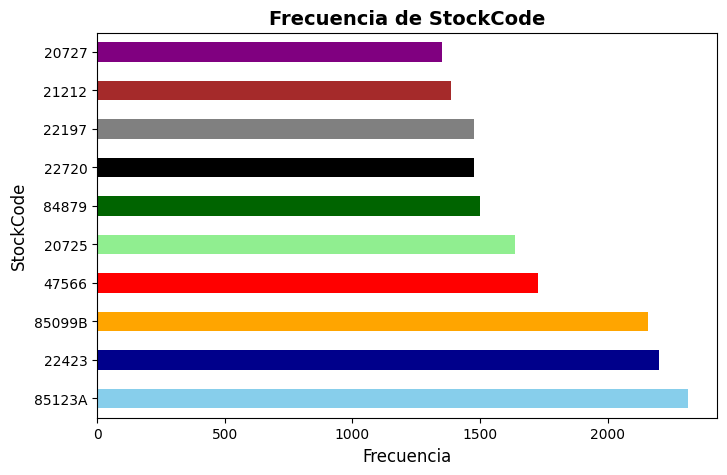

In [ ]:
plt.figure(figsize=(8, 5))
Stock_Count.plot(kind='barh', color=['skyblue', 'DarkBlue', 'orange', 'red', 'lightgreen', 'darkgreen', 'black','gray', 'brown', 'purple'])
plt.title('Frecuencia de StockCode', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('StockCode', fontsize=12)
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [ ]:
TotalPrice = data['Quantity'] * data['UnitPrice']
data['TotalPrice'] = TotalPrice
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Calculate the mean TotalPrice for each InvoiceNo
mean_total_price_per_invoice = data.groupby('InvoiceNo')['TotalPrice'].mean().head(10)

# Display the results
print("Mean TotalPrice per InvoiceNo:")
print (mean_total_price_per_invoice)

Mean TotalPrice per InvoiceNo:
InvoiceNo
536365     19.874286
536366     11.100000
536367     23.227500
536368     17.512500
536369     17.850000
536370     42.793000
536371    204.000000
536372     11.100000
536373     16.241250
536374    350.400000
Name: TotalPrice, dtype: float64


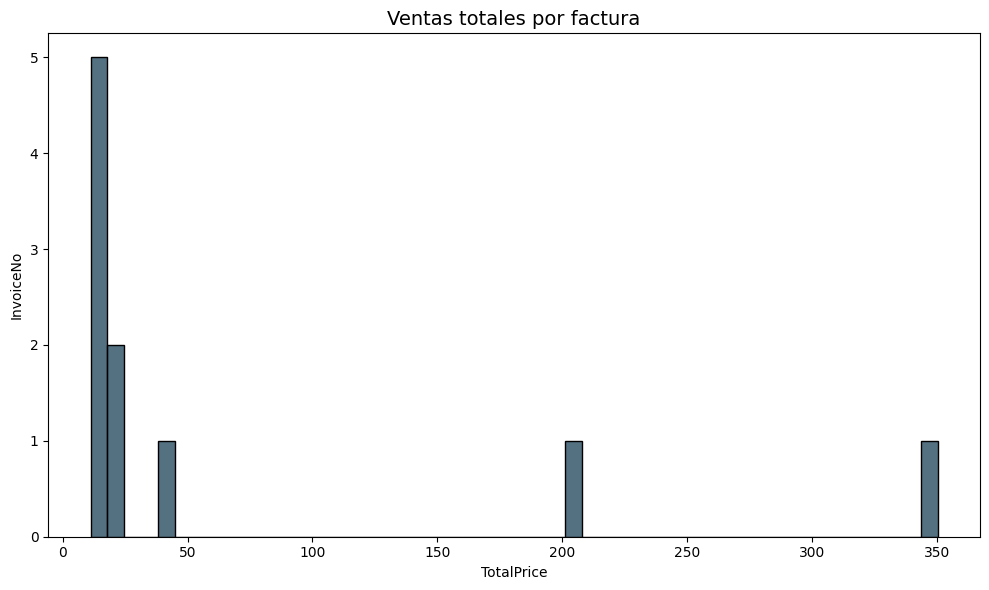

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(mean_total_price_per_invoice.values, bins=50, color='#1b4258', edgecolor='black')
plt.title('Ventas totales por factura', fontsize=14)
plt.xlabel('TotalPrice')
plt.ylabel('InvoiceNo')
plt.tight_layout()
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

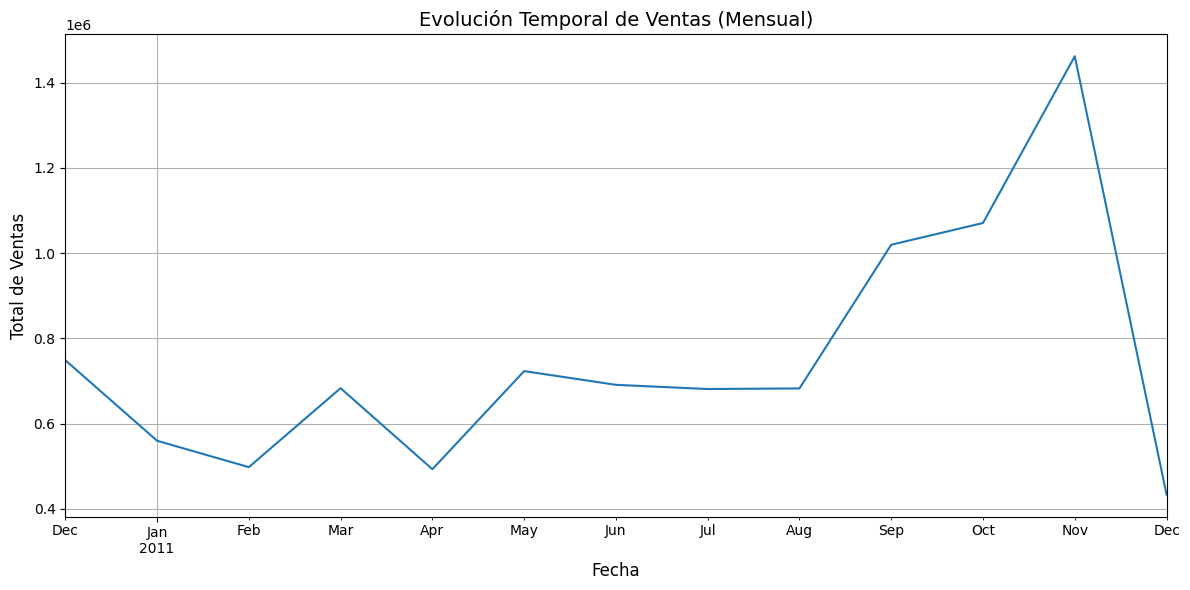

In [ ]:
# Convert 'InvoiceDate' to datetime and extract YearMonth
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and sum TotalPrice
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()

# Convert YearMonth index to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the monthly sales over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='#1f77b4')
plt.title('Evolución Temporal de Ventas (Mensual)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Total de Ventas', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

In [ ]:
# Group by Country and display descriptive statistics for UnitPrice
country_unitprice_description = data.groupby('Country')['UnitPrice'].describe()
print(country_unitprice_description)

                         count        mean         std       min     25%  \
Country                                                                    
Australia               1259.0    3.220612   12.455584      0.00  1.2500   
Austria                  401.0    4.243192    7.355153      0.12  1.2500   
Bahrain                   19.0    4.556316    3.473506      1.25  2.3000   
Belgium                 2069.0    3.644335    4.244522      0.12  1.2500   
Brazil                    32.0    4.456250    2.831727      0.85  2.0475   
Canada                   151.0    6.030331   44.713675      0.10  0.8300   
Channel Islands          758.0    4.932124   15.547404      0.19  1.4500   
Cyprus                   622.0    6.302363   22.419586      0.12  1.2500   
Czech Republic            30.0    2.938333    7.098840      0.29  0.8350   
Denmark                  389.0    3.256941    3.960285      0.21  1.2500   
EIRE                    8196.0    5.911077   54.035173      0.00  1.2500   
European Com

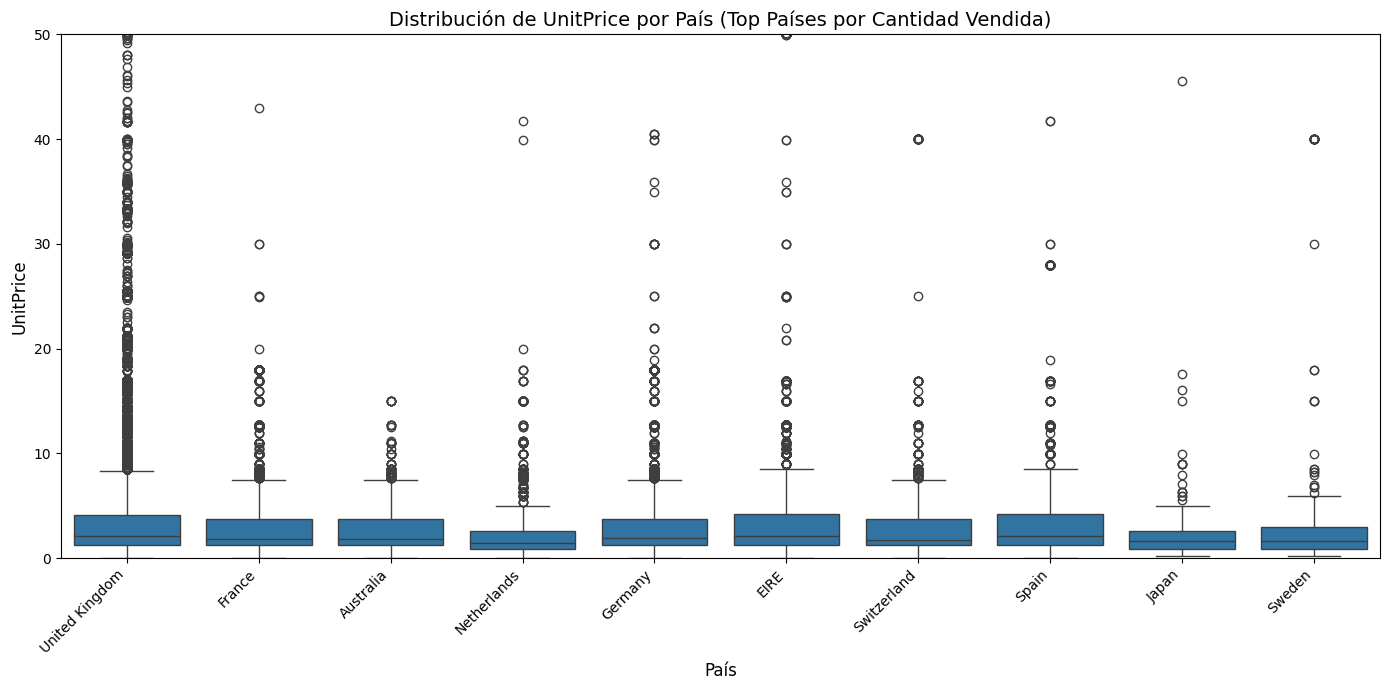

In [ ]:
# Get the top countries by total quantity (adjust the number as needed)
top_countries = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10).index.tolist() # Increased to top 10 for potentially more variation

# Filter the data to include only the top countries
filtered_data = data[data['Country'].isin(top_countries)]

# Create the boxplot for UnitPrice by Country for the filtered data
plt.figure(figsize=(14, 7)) # Increased figure size
sns.boxplot(x='Country', y='UnitPrice', data=filtered_data)
plt.title('Distribución de UnitPrice por País (Top Países por Cantidad Vendida)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('UnitPrice', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Set y-axis limit based on descriptive statistics (e.g., up to the 75th percentile or a bit higher for most countries)
# Looking at the describe output, a limit around 10-20 might be reasonable to see the main distribution, but let's try 50 again as a balance
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

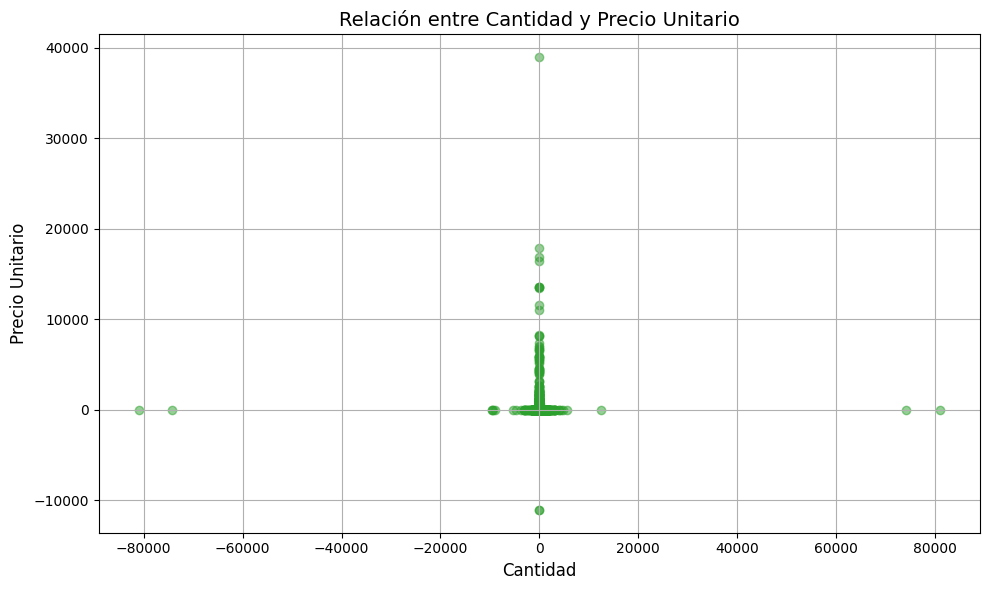

Basado en el gráfico de dispersión, generalmente se observa que a medida que aumenta la Cantidad, el Precio Unitario tiende a disminuir, lo que sugiere una relación inversa.


## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

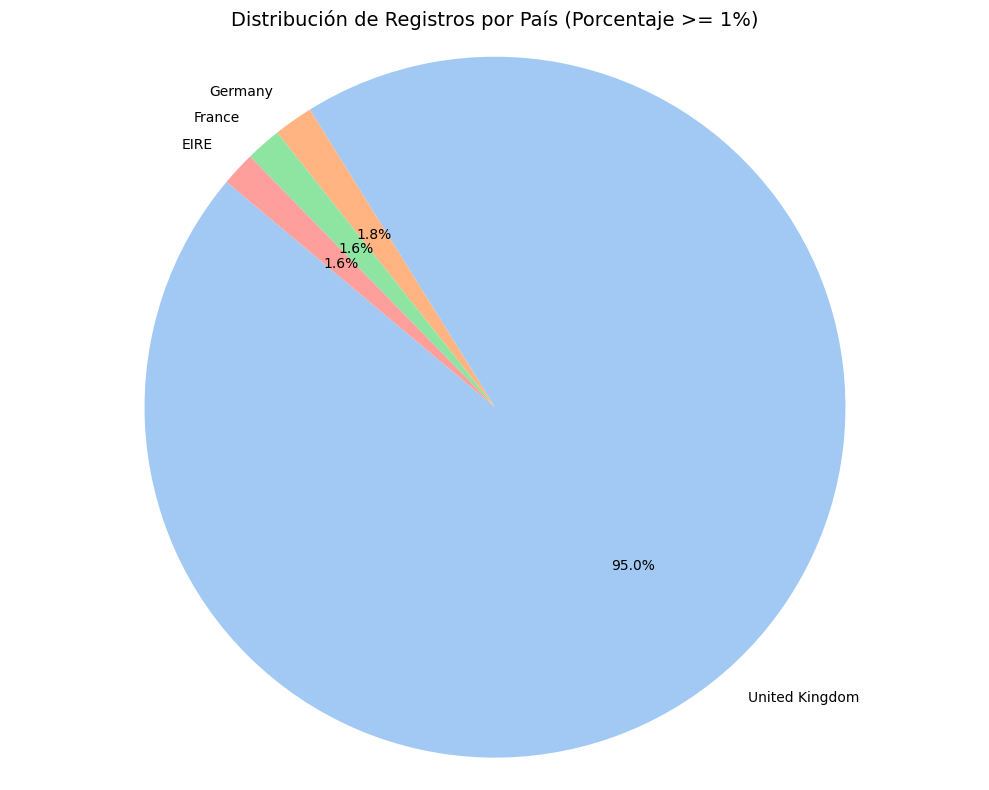

In [45]:
# Get the value counts for the 'Country' column
country_counts = data['Country'].value_counts()

# Calculate the percentage for each country
country_percentages = country_counts / len(data) * 100

# Define a threshold for low percentage (e.g., less than 1%)
threshold = 1

# Filter out countries below the threshold
filtered_country_percentages = country_percentages[country_percentages >= threshold]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(filtered_country_percentages, labels=filtered_country_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Registros por País (Porcentaje >= {}%)'.format(threshold), fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

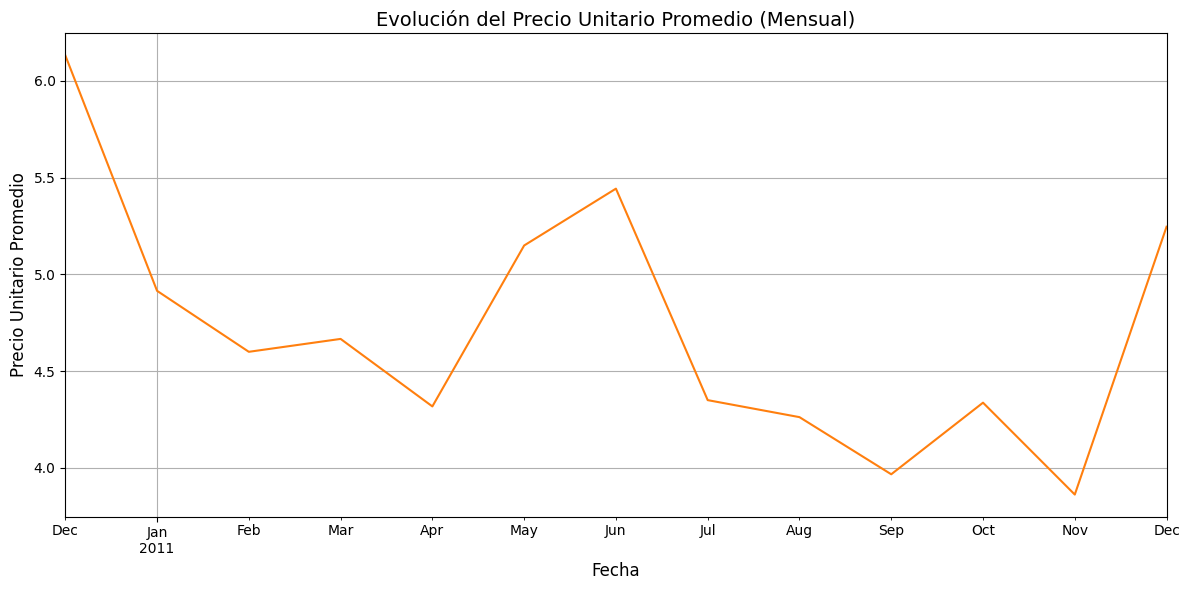

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

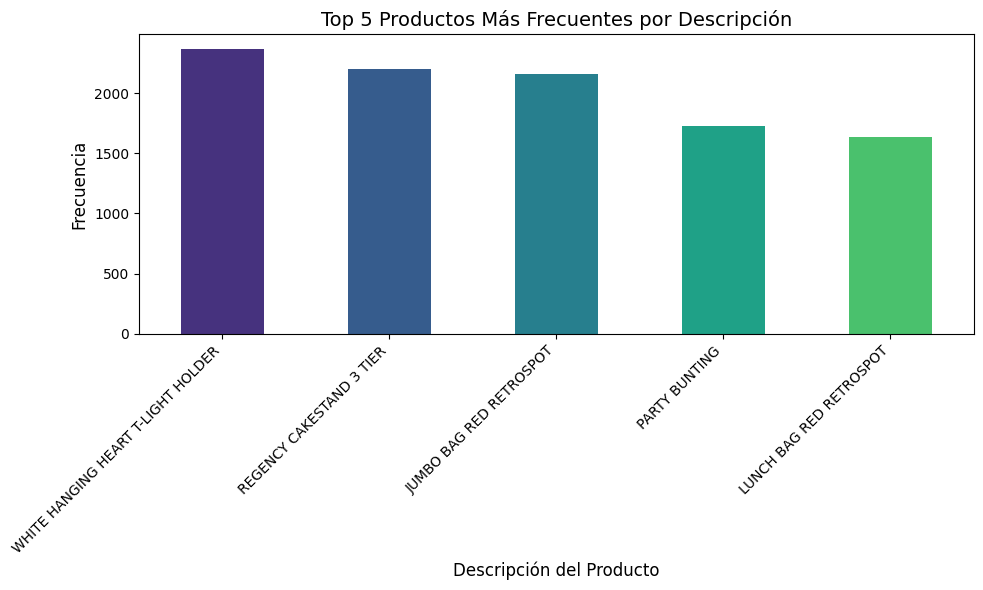

In [ ]:
# Group by Description and count the frequency
description_counts = data['Description'].value_counts()

# Get the top 5 most frequent descriptions
top_5_descriptions = description_counts.head(5)

# Visualize the top 5 most frequent descriptions with a vertical bar chart
plt.figure(figsize=(10, 6))
top_5_descriptions.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Top 5 Productos Más Frecuentes por Descripción', fontsize=14)
plt.xlabel('Descripción del Producto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.